<a href="https://colab.research.google.com/github/victorm0202/temas_selectos_CD-23/blob/main/model_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de predicción con Pytorch

In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4147 sha256=3f9deadf84b4e4ac88dbcc40594a491f7602f5d611c6c8627b8eb430fa02066b
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

# A Simple Regression Problem

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [ ]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

In [ ]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

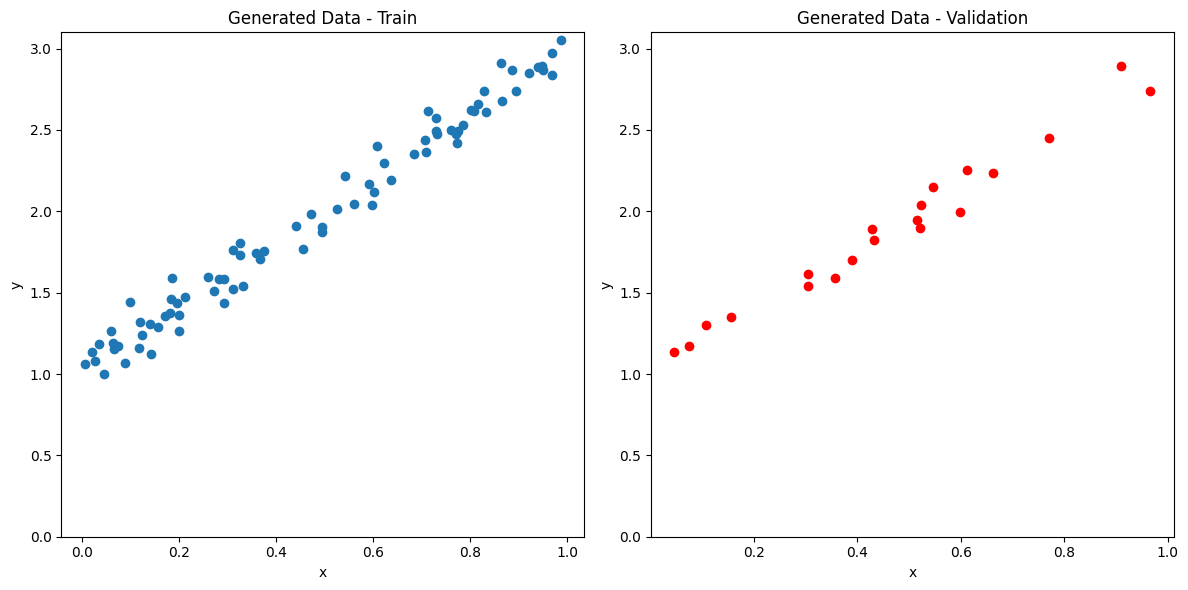

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Generated Data - Train')

ax[1].scatter(x_val, y_val, c='r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Generated Data - Validation')
fig.tight_layout()

# Gradient Descent

## Step 0: Random Initialization

In [ ]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

## Step 1: Compute Model's Predictions

In [ ]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

## Step 2: Compute the Loss

In [ ]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

## Step 3: Compute the Gradients

In [ ]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

## Step 4: Update the Parameters

In [ ]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and
# the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

## Step 5: Rinse and Repeat!

In [ ]:
# Go back to Step 1 and run observe how your parameters b and w change

# Linear Regression in Numpy

In [ ]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Sets learning rate - this is "eta" ~ the "n"-like Greek letter
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train

    # Step 2 - Computes the loss
    # We are using ALL data points, so this is BATCH gradient
    # descent. How wrong is our model? That's the error!
    error = (yhat - y_train)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    b = b - lr * b_grad
    w = w - lr * w_grad

print(b, w)

In [ ]:
b[0]

In [ ]:
# Sanity Check: do we get the same results as our
# gradient descent?
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

In [ ]:
b_minimum, w_minimum = b[0], w[0]
# Generates evenly spaced x feature
x_range = np.linspace(0, 1, 101)
# Computes yhat
yhat_range = b_minimum + w_minimum * x_range

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim([0, 3.1])

# Dataset
ax.scatter(x_train, y_train)
# Predictions
ax.plot(x_range, yhat_range, label='Final model\'s predictions', c='k', linestyle='--')

# Annotations
ax.annotate('b = {:.4f} w = {:.4f}'.format(b_minimum, w_minimum), xy=(.4, 1.5), c='k', rotation=34)
ax.legend(loc=0)
fig.tight_layout()

# PyTorch

## Loading Data, Devices and CUDA

In [ ]:
x_train_tensor = torch.as_tensor(x_train)
x_train.dtype, x_train_tensor.dtype

### Defining your device

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.get_device_name(i))

In [ ]:
# Our data was in Numpy arrays, but we need to transform them
# into PyTorch's Tensors and then we send them to the
# chosen device
x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)

In [ ]:
# Here we can see the difference - notice that .type() is more
# useful since it also tells us WHERE the tensor is (device)
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

Back to numpy: **Numpy cannot handle GPU tensors**… you need to make them CPU tensors first using cpu()

In [ ]:
back_to_numpy = x_train_tensor.numpy()

In [ ]:
back_to_numpy = x_train_tensor.cpu().numpy()

## Creating Parameters

We will apply gradient descent, and we want to run it on a GPU, but, the order is important. Observe the next two cells:

In [ ]:
# Initializes parameters "b" and "w" randomly. Since we want to apply gradient descent on
# these parameters we need to set REQUIRES_GRAD = TRUE
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float)
w = torch.randn(1, requires_grad=True, dtype=torch.float)
print(b, w)

In [ ]:
# now, we send them to device
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
w = torch.randn(1, requires_grad=True, dtype=torch.float).to(device)
print(b, w)
# Sorry, but NO! The to(device) "shadows" the gradient...

Two options to do that correctly:
- We can either create regular tensors and send them to the device (as we did with our data), and THEN set them as requiring gradients...




In [ ]:
torch.manual_seed(42)
b = torch.randn(1, dtype=torch.float).to(device)
w = torch.randn(1, dtype=torch.float).to(device)
# and THEN set them as requiring gradients...
b.requires_grad_()
w.requires_grad_()
print(b, w)

- Or, We can specify the device at the moment of creation (RECOMMENDED)

In [ ]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(b, w)

# Autograd

In [ ]:
# learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Computes the loss (MSE)
    # Observe that we are using ALL data points, so this is BATCH gradient descent
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and the learning rate
    # IMPORTANT: We need to use NO_GRAD to keep the update OUT of the gradient computation. It sets REQUIRES_GRAD to FALSE temporaly
    # Because we are updating the parameters, we DON'T NEED the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        b -= lr * b.grad
        w -= lr * w.grad

    # Clear computed gradients
    b.grad.zero_()
    w.grad.zero_()

    if epoch % 100 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

print(b, w)

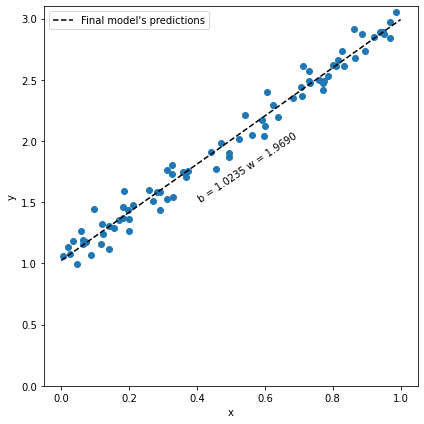

In [ ]:
b_minimum, w_minimum = b.cpu().detach().numpy()[0], w.cpu().detach().numpy()[0]
# Generates evenly spaced x feature
x_range = np.linspace(0, 1, 101)
# Computes yhat
yhat_range = b_minimum + w_minimum * x_range

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim([0, 3.1])

# Dataset
ax.scatter(x_train, y_train)
# Predictions
ax.plot(x_range, yhat_range, label='Final model\'s predictions', c='k', linestyle='--')

# Annotations
ax.annotate('b = {:.4f} w = {:.4f}'.format(b_minimum, w_minimum), xy=(.4, 1.5), c='k', rotation=34)
ax.legend(loc=0)
fig.tight_layout()

# Dynamic Computation Graph

In [ ]:
# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train_tensor

# Step 2 - Computes the loss
error = (y_train_tensor- yhat)
loss = (error ** 2).mean()

- **<font color='blue'>Blue boxes</font>** correspond to the tensors we use as parameters, the ones we’re asking PyTorch to compute gradients for
- **<font color='gray'>Gray box</font>** a Python operation that involves a gradient-computing tensor or its dependencies
- **<font color='green'>Green box</font>** the same as the gray box, except it is the starting point for the computation of gradients (assuming the `backward()`method is called from the variable used to visualize the graph)— they are computed from the bottom-up in a graph

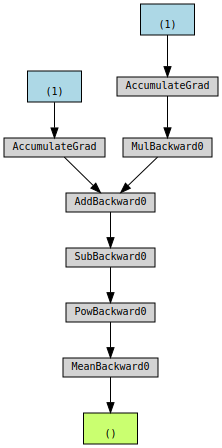

In [ ]:
# We can try plotting the graph for any python variable: yhat, error, loss...
make_dot(loss)

In Pytorch, the computing graph is **dynamic**, and is constructed on the fly. You can make it as complex as you want it, for instance, adding control flow statements (e.g., if statements) to control the flow of the gradients.

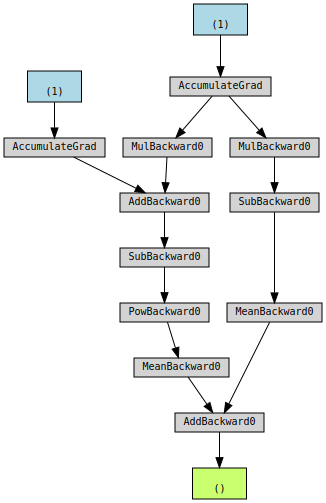

In [ ]:
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = b + w * x_train_tensor
error = yhat - y_train_tensor
loss = (error ** 2).mean()

# this makes no sense!!
if loss > 0:
    yhat2 = w * x_train_tensor
    error2 = yhat2 - y_train_tensor

# neither does this :-)
loss += error2.mean()

make_dot(loss)

# Optimizer

So far, we’ve been manually updating the parameters using the computed gradients. That’s probably fine for two parameters, but what if we had a whole lot of them? We use one of **PyTorch’s optimizers**, like SGD or Adam.

An optimizer takes the parameters we want to update, the learning rate we want to use (and many other hyper-parameters as well) and performs the updates through its `step()` method.

Another advantage is that we don't need to zero the gradients one by one, we just invoke the optimizer’s `zero_grad()` method.


In [ ]:
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# DEFINES A SGD OPTIMIZER to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Computes the loss
    error = (yhat - y_train_tensor)
    loss = (error ** 2).mean()

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and the learning rate. No more manual update!
    # with torch.no_grad():
    #     b -= lr * b.grad
    #     w -= lr * w.grad
    optimizer.step()

    # No more telling Pytorch to let gradients go!
    # b.grad.zero_()
    # w.grad.zero_()
    optimizer.zero_grad()

    if epoch % 100 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

print(b, w)

Epoch 0, Loss 3.191796
Epoch 100, Loss 0.013682
Epoch 200, Loss 0.008313
Epoch 300, Loss 0.008057
Epoch 400, Loss 0.008045
Epoch 500, Loss 0.008045
Epoch 600, Loss 0.008045
Epoch 700, Loss 0.008045
Epoch 800, Loss 0.008045
Epoch 900, Loss 0.008045
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Loss

In PyTorch, there are many [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions)  to choose from, depending on the task at hand. Since ours is a regression, we are using the Mean Square Error (MSE) loss.

In [ ]:
# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')
loss_fn

MSELoss()

In [ ]:
# This is a random example to illustrate the loss function
predictions = torch.tensor([0.5, 1.0])
labels = torch.tensor([2.0, 1.3])
loss_fn(predictions, labels)

tensor(1.1700)

In [ ]:
# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

# Defines a SGD optimizer to update the parameters
optimizer = optim.SGD([b, w], lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1 - Computes model's predicted output - forward pass
    yhat = b + w * x_train_tensor

    # Step 2 - Computes the loss
    # No more manual loss!
    # error = (yhat - y_train_tensor)
    # loss = (error ** 2).mean()
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 100 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

print(b, w)

Epoch 0, Loss 3.191796
Epoch 100, Loss 0.013682
Epoch 200, Loss 0.008313
Epoch 300, Loss 0.008057
Epoch 400, Loss 0.008045
Epoch 500, Loss 0.008045
Epoch 600, Loss 0.008045
Epoch 700, Loss 0.008045
Epoch 800, Loss 0.008045
Epoch 900, Loss 0.008045
tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [ ]:
# Final loss value
loss

tensor(0.0080, device='cuda:0', grad_fn=<MseLossBackward0>)

In [ ]:
loss.detach().cpu().numpy()

# Model

So far, we know how to train a model, but, how we use it to make predictions of new data?

In PyTorch, a model is represented by a regular Python class that inherits from the [Module](https://pytorch.org/docs/stable/nn.html#torch.nn.Module) class.

The most fundamental methods it needs to implement are:
- The constructor `__init__(self)`: it defines the parts that make up the model, in our case, two parameters, $a$ and $w$.
- `forward(self, x)`: it performs the actual computation, that is, it outputs a prediction, given the input x.

  __Note:__ You should NOT call the `forward(x)` method, though. You should call the whole model itself, as in `model(x)` to perform a forward pass and output predictions.

In [ ]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # To make "b" and "w" real parameters of the model, we need to wrap them with nn.Parameter class
        # to tell PyTorch these tensors should be considered parameters of the model they are an attribute of
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.w = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x):
        # Computes the outputs / predictions
        return self.b + self.w * x

Note that, it is important to use the `Parameter` class with our parameters. By doing so, we can use our model’s `parameters()` method to retrieve an iterator over all model’s parameters, even those parameters of nested models, that we can use to feed our optimizer (instead of building a list of parameters ourselves!).

Moreover, we can get the current values for all parameters using our model’s `state_dict()` method.

## state_dict

In PyTorch, the learnable parameters (i.e. weights and biases) of a `torch.nn.Module` model are contained in the model’s parameters (accessed with `model.parameters()`). A **`state_dict`** is simply a Python dictionary object that maps each layer to its parameter tensor.

A `state_dict` is an integral entity if you are interested in saving or loading models from PyTorch. Because `state_dict` objects are Python dictionaries, they can be easily saved, updated, altered, and restored, adding a great deal of modularity to PyTorch models and optimizers.

Note that **only layers with learnable parameters** (convolutional layers, linear layers, etc.) and registered buffers (batchnorm’s running_mean) have entries in the model’s state_dict. **Optimizer objects** (torch.optim) also have a state_dict, which contains information about the optimizer’s state, as well as the hyperparameters used.

In [ ]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [ ]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.1,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'params': [0, 1]}]}

## device

We need to send our model to the same device where the data is. If our data is made of GPU tensors, our model must "*live*" inside the GPU as well.

In [ ]:
torch.manual_seed(42)
# Creates a "dummy" instance of our ManualLinearRegression model
# and sends it to the device
dummy = ManualLinearRegression().to(device)

## Forward Pass

In [ ]:
# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = ManualLinearRegression().to(device)

# Defines a SGD optimizer to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    model.train() # What is this???

    # Step 1 - Computes model's predicted output - forward pass
    # No more manual prediction!
    yhat = model(x_train_tensor)

    # Step 2 - Computes the loss
    loss = loss_fn(yhat, y_train_tensor)

    # Step 3 - Computes gradients for both "b" and "w" parameters
    loss.backward()

    # Step 4 - Updates parameters using gradients and
    # the learning rate
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 100 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))

# We can also inspect its parameters using its state_dict
print(model.state_dict())

Epoch 0, Loss 2.747487
Epoch 100, Loss 0.014369
Epoch 200, Loss 0.008346
Epoch 300, Loss 0.008059
Epoch 400, Loss 0.008045
Epoch 500, Loss 0.008045
Epoch 600, Loss 0.008045
Epoch 700, Loss 0.008045
Epoch 800, Loss 0.008045
Epoch 900, Loss 0.008045
OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


## Train

In PyTorch, models have a `train()` method which, somewhat disappointingly, does NOT perform a training step. Its only purpose is to set the model to training mode. Why is this important? Some models may use mechanisms like Dropout, for instance, which have distinct behaviors in training and evaluation phases.

In [ ]:
## Never forget to include model.train() in your training loop!

## Nested Models

In our model class, we can create very complex models, such as encoder-decoder with specific neural network architectures (convolutional, recurrent, etc). Each one of these architectures are models itself, *nested* in our model class.

Let's see a simple example, where will use PyTorch’s [linear model](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear) as an attribute of our own, thus creating a nested model.

In [ ]:
linear = nn.Linear(1, 1)
linear

Linear(in_features=1, out_features=1, bias=True)

In [ ]:
linear.state_dict()

OrderedDict([('weight', tensor([[-0.2191]])), ('bias', tensor([0.2018]))])

In the `__init__` method, we created an attribute that contains our nested Linear model.

In the `forward()` method, we call the nested model itself to perform the forward pass (notice, we are not calling `self.linear.forward(x)`!).

In [ ]:
class LayerLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        # Instead of our custom parameters, we use a Linear model with single input and single output
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        # Now it only takes a call to the layer to make predictions
        self.linear(x)

Now, if we call the `parameters()` method of this model, PyTorch will figure the parameters of its attributes in a recursive way. You can try it yourself using something like: `[*LayerLinearRegression().parameters()]` to get a list of all parameters. You can also add new Linear attributes and, even if you don’t use them at all in the forward pass, they will still be listed under `parameters()`.

In [ ]:
torch.manual_seed(42)
dummy = LayerLinearRegression().to(device)
list(dummy.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [ ]:
dummy.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

## Sequential Models

Deep neural networks, included those we will use in this course, are *sequential* models composed of layers, where the output of a layer is sequentially fed as an input to the next.

In our simple lineal model example, we would build a Sequential model with a single argument, that is, the Linear layer we used to train our linear regression. The model would look like this:

In [ ]:
torch.manual_seed(42)
# Alternatively, you can use a Sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

## Layers

In nested sequential models, any internal model is a **layer**.

A Linear model can be seen as a layer in a neural network:

![landscape](https://drive.google.com/uc?id=1V3Tg9uKxVfXmpXp9s86JWV2raoucbQML)




In [ ]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential(nn.Linear(3, 5), nn.Linear(5, 1)).to(device)

model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

Since this sequential model does not have attribute names, state_dict() uses numeric prefixes.

You can also use a model’s `add_module()` method to be able to name the layers:

In [ ]:
torch.manual_seed(42)
# Building the model from the figure above
model = nn.Sequential()
model.add_module('layer1', nn.Linear(3, 5))
model.add_module('layer2', nn.Linear(5, 1))
model.to(device)

model.state_dict()

OrderedDict([('layer1.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('layer2.bias', tensor([-0.2062], device='cuda:0'))])

There are **many** different [layers](https://pytorch.org/docs/stable/nn.html) that can be used in PyTorch. We will see many of them in this course.

# Putting It All Together

## Model configuration.

Here, we will include these elements:

- a model
- a loss function (which needs to be chosen according to your model)
- an optimizer

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Sets learning rate
lr = 0.1

# Step 0 - Initializes parameters "b" and "w" randomly
torch.manual_seed(42)
# Now we can create A MODEL and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD OPTIMIZER to update the parameters
# (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE LOSS FUNCTION
loss_fn = nn.MSELoss(reduction='mean')

## Model Training

Once defined the model, and given a set of **features** and **labels**, the training loops over the gradient descent steps we’ve seen at the beginning of this chapter:

1.   compute model’s predictions
2.   compute the loss
3.   compute the gradients
4.   update the parameters

This sequence is repeated over and over until the number of epochs is reached.

In [ ]:
def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fn(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()

    # Returns the function that will be called inside the train loop
    return train_step

# Creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

# Defines number of epochs
n_epochs = 1000
# For each epoch...
for epoch in range(n_epochs):
    # Performs one train step and returns the corresponding loss
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)

# Checks model's parameters
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])


In [ ]:
losses

Would `make_train_step` code change if we were using a different optimizer, or loss, or even model?

## Dataset

So far, the only data preparation we performed was transforming Numpy arrays into PyTorch tensors, but in Pytorch, we have a useful class and methods to handle it.

In PyTorch, a dataset is represented by a regular Python class that inherits from the **Dataset class**. You can think of it as a kind of a Python list of tuples, each tuple corresponding to one point (features, label).

The The most fundamental methods it needs to implement are:

- `__init__(self)` : it takes whatever arguments needed to build a list of tuples — it may be the name of a CSV file that will be loaded and processed; it may be two tensors, one for features, another one for labels; or anything else, depending on the task at hand.

  IMPORTANT: There is no need to load the whole dataset in the constructor method (`__init__`). If your dataset is big (tens of thousands of image files, for instance), loading it at once would not be memory efficient. It is recommended to load them on demand (whenever `__get_item__` is called). We will see more of this soon.

- `__get_item__(self, index)`: it allows the dataset to be indexed, so it can work like a list (`dataset[i]`) — it must return a tuple (features, label) corresponding to the requested data point. We can either return the corresponding slices of our pre-loaded dataset or tensors or, as mentioned above, load them on demand.

- `__len__(self)`: it should simply return the size of the whole dataset so, whenever it is sampled, its indexing is limited to the actual size

In [ ]:
# Example

from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

# Wait, is this a CPU tensor now? Why? Where is .to(device)?
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))
(tensor([0.7713]), tensor([2.4745]))


**OBSERVE** that we built our training tensors out of Numpy arrays but we did not send them to a device? So, they are CPU tensors now!

We don’t want our whole training data to be loaded into GPU tensors, as we have been doing in our example so far, because it takes up space in our precious graphics card’s RAM.

## DataLoader

In our simple linear regression example, we used batch gradient descent, (i.e., we used the whole training data at every training step), but generally, we will use mini-batch gradient descent. Thus, we need mini-batches ("*slices*" of our dataset)

We can use use PyTorch’s **DataLoader** class. We tell it which dataset to use, the desired mini-batch size and if we’d like to shuffle it or not.

Our loader will behave like an iterator, so we can loop over it and fetch a different mini-batch every time.

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        # the dataset "lives" in the CPU, so do our mini-batches therefore, we need to send those mini-batches to the
        # device where the model "lives"
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)

        if epoch % 100 == 0:
          print('Epoch %d, Loss %f' % (epoch, float(loss)))

print(model.state_dict())

Epoch 0, Loss 0.010778
Epoch 0, Loss 0.009254
Epoch 0, Loss 0.005545
Epoch 0, Loss 0.009093
Epoch 0, Loss 0.005926
Epoch 100, Loss 0.005049
Epoch 100, Loss 0.008517
Epoch 100, Loss 0.012365
Epoch 100, Loss 0.010788
Epoch 100, Loss 0.004192
Epoch 200, Loss 0.009954
Epoch 200, Loss 0.010472
Epoch 200, Loss 0.007589
Epoch 200, Loss 0.006612
Epoch 200, Loss 0.005935
Epoch 300, Loss 0.010226
Epoch 300, Loss 0.010650
Epoch 300, Loss 0.007348
Epoch 300, Loss 0.006183
Epoch 300, Loss 0.006084
Epoch 400, Loss 0.008207
Epoch 400, Loss 0.005627
Epoch 400, Loss 0.013359
Epoch 400, Loss 0.006138
Epoch 400, Loss 0.007319
Epoch 500, Loss 0.007649
Epoch 500, Loss 0.010010
Epoch 500, Loss 0.008143
Epoch 500, Loss 0.007255
Epoch 500, Loss 0.007613
Epoch 600, Loss 0.007066
Epoch 600, Loss 0.003961
Epoch 600, Loss 0.008639
Epoch 600, Loss 0.011508
Epoch 600, Loss 0.009555
Epoch 700, Loss 0.010578
Epoch 700, Loss 0.004490
Epoch 700, Loss 0.010441
Epoch 700, Loss 0.007924
Epoch 700, Loss 0.006942
Epoch 800,

Observe that, now, we have an inner loop to load each and every mini-batch from our DataLoader and, more importantly, we are now sending only one mini-batch to the device.

For bigger datasets, loading data sample by sample (into a CPU tensor) using Dataset’s `__get_item__` and then sending all samples that belong to the same mini-batch at once to your GPU (device) is the way to go in order to make the best use of your graphics card’s RAM. Moreover, if you have many GPUs to train your model on, it is best to keep your dataset “agnostic” and assign the batches to different GPUs during training.

## Evaluation

So far, we’ve focused on the training data only. We built a dataset and a data loader for it. We could do the same for the validation data.

PyTorch’s `random_split()` method is an easy and familiar way of performing a training-validation split. Just keep in mind that, in our example, we need to apply it to the whole dataset. Then, for each subset of data, we build a corresponding **DataLoader**.

Once we have a data loader for our validation set, so, it makes sense to use it for the **Evaluation** step:

In [ ]:
from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()
dataset = TensorDataset(x_tensor, y_tensor)

# defines train and validation datasets
train_dataset, val_dataset = random_split(dataset, [80, 20])

# now, we create a DataLoader for each dataset
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=20, shuffle=True)

# training and validation steps
losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)

    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)

            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9625]], device='cuda:0')), ('0.bias', tensor([1.0196], device='cuda:0'))])


Two observations respecting to Evaluation:

- `torch.no_grad()`: even though it won’t make a difference in our simple model, it is a good practice to wrap the validation inner loop with this context manager to disable any gradient calculation that you may inadvertently trigger (remember: *gradients belong in training, not in validation steps*)

- `eval()`: the only thing it does is setting the model to evaluation mode (just like its `train()` counterpart did), so the model can adjust its behavior regarding some operations, like Dropout.

In [ ]:
val_losses

# Final model

In [ ]:
torch.manual_seed(42)

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# Builds dataset with ALL data
dataset = TensorDataset(x_tensor, y_tensor)
# Splits randomly into train and validation datasets
train_dataset, val_dataset = random_split(dataset, [80, 20])
# Builds a loader for each dataset to perform mini-batch gradient descent
train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

# Builds a simple sequential model
model = nn.Sequential(nn.Linear(1, 1)).to(device)
print(model.state_dict())

# Sets hyper-parameters
lr = 1e-1
n_epochs = 100

# Defines loss function and optimizer
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

losses = []
val_losses = []
# Creates function to perform train step from model, loss and optimizer
train_step = make_train_step(model, loss_fn, optimizer)

# Training loop
for epoch in range(n_epochs):
    # Uses loader to fetch one mini-batch for training
    for x_batch, y_batch in train_loader:
        # NOW, sends the mini-batch data to the device
        # so it matches location of the MODEL
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        # One stpe of training
        loss = train_step(x_batch, y_batch)
        losses.append(loss)

    # After finishing training steps for all mini-batches,
    # it is time for evaluation!

    # We tell PyTorch to NOT use autograd...
    # Do you remember why?
    with torch.no_grad():
        # Uses loader to fetch one mini-batch for validation
        for x_val, y_val in val_loader:
            # Again, sends data to same device as model
            x_val = x_val.to(device)
            y_val = y_val.to(device)

            # What is that?!
            model.eval()
            # Makes predictions
            yhat = model(x_val)
            # Computes validation loss
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())
    print(f"[{epoch+1}] Training loss: {loss:.3f}\t Validation loss: {val_loss:.3f}")

OrderedDict([('0.weight', tensor([[-0.9676]], device='cuda:0')), ('0.bias', tensor([-0.5727], device='cuda:0'))])
[1] Training loss: 1.051	 Validation loss: 0.849
[2] Training loss: 0.227	 Validation loss: 0.210
[3] Training loss: 0.170	 Validation loss: 0.139
[4] Training loss: 0.150	 Validation loss: 0.115
[5] Training loss: 0.131	 Validation loss: 0.098
[6] Training loss: 0.114	 Validation loss: 0.085
[7] Training loss: 0.100	 Validation loss: 0.074
[8] Training loss: 0.088	 Validation loss: 0.064
[9] Training loss: 0.077	 Validation loss: 0.056
[10] Training loss: 0.068	 Validation loss: 0.049
[11] Training loss: 0.060	 Validation loss: 0.043
[12] Training loss: 0.053	 Validation loss: 0.037
[13] Training loss: 0.047	 Validation loss: 0.033
[14] Training loss: 0.042	 Validation loss: 0.029
[15] Training loss: 0.037	 Validation loss: 0.026
[16] Training loss: 0.034	 Validation loss: 0.023
[17] Training loss: 0.030	 Validation loss: 0.021
[18] Training loss: 0.028	 Validation loss: 0

In [ ]:
print(model.state_dict())
print('mean training loss:', np.mean(losses))
print('mean validation loss:', np.mean(val_losses))

OrderedDict([('0.weight', tensor([[1.9616]], device='cuda:0')), ('0.bias', tensor([1.0152], device='cuda:0'))])
mean training loss: 0.0690538402562961
mean validation loss: 0.0269468957465142


In [ ]:
model.state_dict()['0.weight']
model.state_dict()['0.bias']

tensor([1.0152], device='cuda:0')

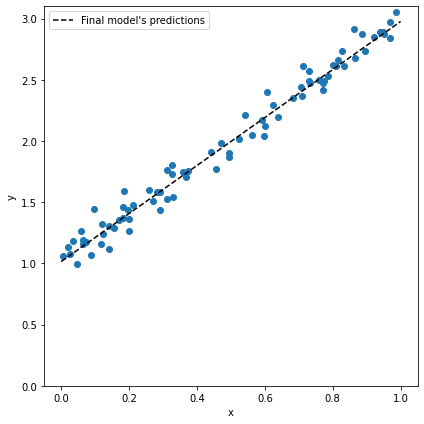

In [ ]:
b_minimum, w_minimum = model.state_dict()['0.bias'].cpu().detach().numpy()[0], model.state_dict()['0.weight'].cpu().detach().numpy()[0]
# Generates evenly spaced x feature
x_range = np.linspace(0, 1, 101)
# Computes yhat
yhat_range = b_minimum + w_minimum * x_range

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim([0, 3.1])

# Dataset
ax.scatter(x_train, y_train)
# Predictions
ax.plot(x_range, yhat_range, label='Final model\'s predictions', c='k', linestyle='--')

# Annotations
ax.legend(loc=0)
fig.tight_layout()